In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from numpy import random

#%%
def jdwucha(A1,data2):
    dist_temp = np.abs(A1 - data2) / (Num1)
    dist = dist_temp.sum(axis=0)
    return dist

#%%
def xdwucha(data1,data2):                 #data1是预测的矩阵；data2是要做比较的真实矩阵
    dist_temp = (np.abs((data1 - data2)/data2))/(Num1)
    dist = dist_temp.sum(axis=0)
    return dist

#%%
def MSE(A1,data2):
    dist_temp = (np.power((A1 - data2),2))/Num1
    dist = dist_temp.sum(axis=0)
    return dist

#%%
def RMSE(M):
    dist = np.power(M,0.5)
    return dist
#%%
def fanguiy(A1):#反归一化
    A2 = A1.copy()
    for j in range(0,Num2):
        madata = max(data[:, j])
        midata = min(data[:, j])
        A2[:,j] = A1[:,j] * (madata - midata) + midata

    return A2

#%%
def drawPre(title,preData,realData,dataNum=10):
    plt.title(title)
    plt.plot(range(dataNum), preData, color='green', label='predict');
    plt.plot(range(dataNum), realData, color='red', label='real');
    plt.legend();
    plt.xlabel('time');
    plt.ylabel('value');
    plt.show();


In [2]:
#%%
def errorLp(W,data,data_front,time):
    A1 = cala(W,data,data_front,time)                 #更新后的矩阵
    dist = np.linalg.norm(A1 - data)/ItemNum1         #预测矩阵与真实矩阵的欧式距离
    return dist


#%%
def initialization(pop_size,A,data,data_front):

    B1 = [0]*pop_size                                        #对应误差
    for i in range (pop_size):
        B1[i] = errorLp(A[i], data, data_front ,ItemNum1)                 #计算初始种群的误差

    j = B1[B1.index(min(B1))]
    g = B1.index(min(B1))
    b = B1.index(max(B1))
    bestw= A[g]

    return bestw,j,b                                         #返回最好的权重和误差,和最坏的下标

def crossover(A):#融合交叉
    #A = list(A)
    nA = [0]*8

    for i in range (0,int(pop_size/2)):
        if random.random() < pop_cr:

            r = random.random()
            R1 = np.array([[r] * ItemNum2 for i in range(ItemNum2)])
            R2 = np.array([[1-r] * ItemNum2 for i in range(ItemNum2)])

            nA[2 * i] = (R1 * np.array(A[2 * i]) + R2 * np.array(A[2 * i+1]))
            nA[2 * i+1] = (R1 * np.array(A[2 * i+1])+ R2 * np.array(A[2 * i]))
        else:
            nA[2 * i] = A[2 * i]
            nA[2 * i+1] = A[2 * i+1]
    return nA

def mutation(A):
    for i in range(0,pop_size):
        A[i] = np.array(A[i])
        if random.random() < pop_mr:
            step = random.uniform(0,0.1)
            step1= np.array([[step] * 6 for i in range(6)])
            if random.random()< 0.1:
                A[i] = A[i] - step1
            else:
                A[i] = A[i] + step1
    return A

def newA(BESTW,A,data,data_front ,k,m):                                          
    #生成新的种群和更新最优权重矩阵
    A = crossover(A)
    A = mutation(A)

    BESTWtemp,j,p = initialization(pop_size, A, data, data_front)
    if j<=k:
        BESTW = BESTWtemp                                              #留下每一代最好的权重矩阵
    A[p] = BESTW
    return A,BESTW

def f(x):
    y = 1/(1+np.exp(-x))
    return y
#%%
def cala(W,data,data_front,time):
    A2 = [0] * time
    A2[0] = f(np.dot(data_front,W))
    for i in range(1,time):
        A2[i] = f(np.dot(data[i-1], W))
        #A2[i + 1] = f(temp)
    return A2

def cala1(W,data):
    A2 = np.zeros(data.shape[0])
    for j in range(data.shape[0]):
        temp = np.dot(W[j],data)
        A2[j] = f(temp)
    return A2

def caa(W,data):
    A2 = [0]*a
    for o in range (0,a):
        temp = np.dot(data,W)
        A2 = f(temp)
    return A2
        

In [3]:
#%%
arr1 = pd.read_csv('dataProcess.csv',index_col = 0)
data1 = np.array(arr1)
if __name__ == '__main__':
    pop_size = 8  # 初始种群个数
    pop_cr = 0.5  # 交叉概率
    pop_mr = 0.3  # 变异概率
    pop_ma = 1  # 变异系数
    iternum = 100
    w = 504        #滑动窗口大小
    a = 1      #预测未来一小时的
    start = 0
    dataf = pd.read_csv('dataProcess.csv',index_col = 0)
    data2 = dataf.iloc[w + start:w + iternum + start,:]

    Num1=data2.shape[0]                             #测试集行数189
    Num2=data2.shape[1]                             #列数6

    data_pred = [0]*iternum

    for i in range(0,iternum):
        t = 0
        BESTW = [0]
        
        #print(i)
        data = data1[i+start:i +start+ w, :]
        
        data_front = data1[i+start-1]
        #print(data_front)
        ItemNum1 = data.shape[0]  # 训练集行数504
        ItemNum2 = data.shape[1]  # 列数6

        A = [0] * pop_size  # 初始种群

        for j in range(pop_size):
            A[j] = -1 + 2 * np.random.random((ItemNum2, ItemNum2))
        
        #print(str(len(A[0])),data.shape,data_front.shape)
        
        bestw, k, m = initialization(pop_size, A, data, data_front)
        for op in range(500):
            A, bestw = newA(bestw, A, data, data_front, k, m)

        data_test = data1[i + start + w-1]  # 测试输入
        data_pred[i] = cala1(bestw,data_test)

绝对误差：CO      0.123413
NO2     0.130754
SO3     0.157196
O3      0.097681
PM25    0.185119
PM10    0.217218
dtype: float64
相对误差：CO      2.908430
NO2     1.575049
SO3     0.872027
O3           inf
PM25    3.431646
PM10    2.468197
dtype: float64
欧式距离：0.05734639882209195
MSE：CO      0.022916
NO2     0.046472
SO3     0.037968
O3      0.018445
PM25    0.088528
PM10    0.114531
dtype: float64
RMSE:CO      0.151381
NO2     0.215574
SO3     0.194854
O3      0.135814
PM25    0.297536
PM10    0.338425
dtype: float64


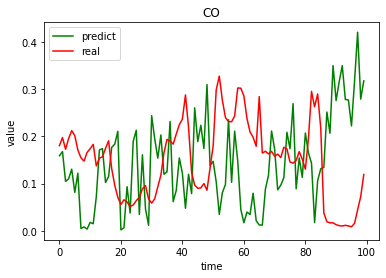

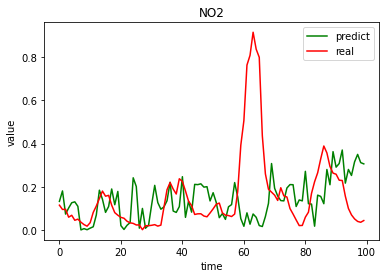

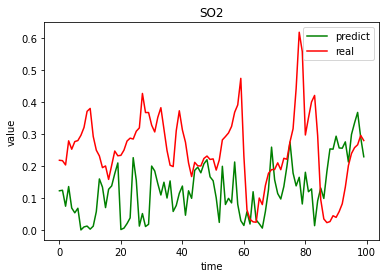

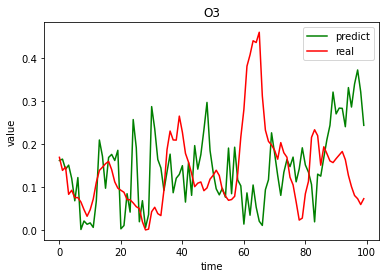

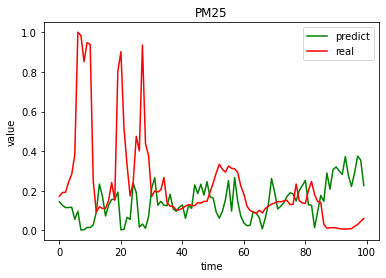

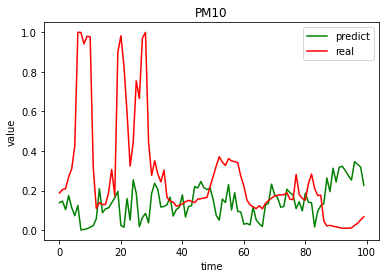

In [5]:
#print(bestw)                  # 最优权重矩阵展示

#最优权重矩阵做预测
A1 = np.array(data_pred)                    #预测出的数据
data2 = dataf.iloc[w+start:w +start+ iternum,:]
#A1 = fanguiy(A1)                           #反归一化后的预测数据
Mwucha = MSE(A1,data2)
Rwucha = RMSE(Mwucha)

# A1 = cala(bestw, data2, Num1)  # 更新后的矩阵
# A1 = np.array(A1)
Bm = np.linalg.norm(A1 - data2) / Num1         #欧式距离

jd = jdwucha(A1,data2)
xd = xdwucha(A1,data2)


# print(bestw)
print('绝对误差：{}'.format(jd))
print('相对误差：{}'.format(xd))
print('欧式距离：{}'.format(Bm))
print('MSE：{}'.format(Mwucha))
print('RMSE:{}'.format(Rwucha))


temp = [0]*5
temp[0] = ["CO","NO2","SO2","O3","PM25","PM10"]
temp[1] = jd
temp[2] = xd
temp[3] = Mwucha
temp[4] = Rwucha
temp = np.array(temp)
temp = pd.DataFrame(temp)
temp.to_csv('RCGA_prediction_FCGA.csv' , header=None)

A1 = A1.T
data2 = data2.T

drawPre("CO",A1[0],data2.iloc[0],iternum)
drawPre("NO2",A1[1],data2.iloc[1],iternum)
drawPre("SO2",A1[2],data2.iloc[2],iternum)
drawPre("O3",A1[3],data2.iloc[3],iternum)
drawPre("PM25",A1[4],data2.iloc[4],iternum)
drawPre("PM10",A1[5],data2.iloc[5],iternum)